In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import viz
np.random.seed(29)

How likely is it that you roll doubles when rolling two dice?

In [18]:
#2/12 == 1/6 == .1666
outcomes = [1,2,3,4,5,6]
n_simulations = 100_000
n_dice = 2
die_rolls = np.random.choice(outcomes,(n_simulations,n_dice))
df = pd.DataFrame(die_rolls)
len( df[ (df[0] == df[1]) ]) / len(df)

0.16649


If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [35]:
#    5/8
outcomes = ["H","T"]
n_simulations = 100_000
n_coins = 8
coin_flips = np.random.choice(outcomes,(n_simulations,n_coins))
head_count = (coin_flips == "H").sum(axis=1) #does the sum per "column" (simulation), axis can be 0 or 1 for columns or rows (r0w,co1umn)
print((head_count == 3).mean(), "3 head exact")
print((head_count > 3).mean(), "more than 3 heads")

0.22106 3 head exact
0.63303 more than 3 heads


There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [78]:
# 1/4 * 1/4 = 1/16
outcomes = ["WD","WD","WD","DS"]
n_simulations = 100_000
n_billboards = 2
billboard_array = np.random.choice(outcomes,(n_simulations,n_billboards))
DS_Student = (billboard_array == "DS").sum(axis=1) #does the sum per "column" (simulation), axis can be 0 or 1 for columns or rows (r0w,co1umn)
print((DS_Student == 2).mean())

0.06252


In [399]:
#from class
outcomes = ["WD","DS"]
n_simulations = 100_000
n_billboards = 2
bill_board = np.random.choice(outcomes,(n_simulations,n_billboards),p=[0.75 , 0.25])
DS_Student = (bill_board == "DS").sum(axis=1) #does the sum per "column" (simulation), axis can be 0 or 1 for columns or rows (r0w,co1umn)
print((DS_Student == 2).mean())

0.06255


Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [160]:
std_poptart = 1.5
mean_poptart = 3
n_trials = 5 #5 days in week
n_simulations = 100_000
poptart_usage = np.random.normal(mean_poptart,std_poptart,(n_simulations,n_trials))
any_poptarts_left_on_friday = ((17 - poptart_usage.sum(axis=1)) >= 1)
any_poptarts_left_on_friday.mean()

0.61617

In [401]:
#from class
mean = 3
sd = 1.5
n_days = 5
poptarts_bought_per_day = np.random.normal(mean,sd,size=(n_simulations,n_days))
poptarts_bought_per_week = poptarts_bought_per_day.sum(axis=1)
(poptarts_bought_per_week < 17).mean()

0.7229

Compare Heights
Men have an average height of 178 cm and standard deviation of 8cm.
Women have a mean of 170, sd = 6cm.
Since you have means and standard deviations, you can use np.random.normal to generate observations.

If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [403]:
std_men = 8
mean_men = 178
std_women = 6
mean_women = 170
n_instances = 1
n_simulations = 100_000
women_heights = (np.random.normal(mean_women,std_women,(n_simulations,n_instances)))
men_heights = (np.random.normal(mean_men,std_men,(n_simulations,n_instances)))

(women_heights > men_heights).mean()


0.21106

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [226]:
corrupt_install = (1/250)
n_students = 50
n_simulations = 100_000
data = np.random.random((n_simulations,n_students))
failures = (data <= corrupt_install).sum(axis=1)
#print(pd.Series(failures).value_counts(),"\n")
print(((failures == 0).mean() *100),"% chance of no failures @ 50 \n")

corrupt_install = (1/250)
n_students = 100
n_simulations = 100_000
data = np.random.random((n_simulations,n_students))
failures = (data <= corrupt_install).sum(axis=1)
#print(pd.Series(failures).value_counts(),"\n")
print(((failures == 0).mean() *100),"% chance of no failures @ 100")

81.64 % chance of no failures @ 50 

67.062 % chance of no failures @ 100


In [412]:
## from class
outcomes = ["S","F"]
n_students = 50
downloads = np.random.choice(outcomes, (n_simulations,n_students), p=[(249/250),(1/250)])
success = (downloads == "S").sum(axis=1)
print((success == n_students).mean(), "success@50")


0.8183 success@50


What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [103]:
corrupt_install = (1/250)
n_students = 150
n_simulations = 100_000
data = np.random.random((n_simulations,n_students))
failures = (data <= corrupt_install).sum(axis=1)
print(pd.Series(failures).value_counts(),"\n")
print(((failures > 0).mean() *100),"% chance of issue @ 150")

0    54612
1    33103
2     9965
3     1975
4      290
5       51
6        4
dtype: int64 

45.388 % chance of issue @ 150


How likely is it that 450 students all download anaconda without an issue?

In [104]:
corrupt_install = (1/250)
n_students = 450
n_simulations = 100_000
data = np.random.random((n_simulations,n_students))
failures = (data <= corrupt_install).sum(axis=1)
print(pd.Series(failures).value_counts(),"\n")
print(((failures == 0).mean() *100),"% without chance of failure @ 450")

1     29746
2     26788
0     16473
3     16067
4      7288
5      2625
6       793
7       169
8        36
9        11
10        4
dtype: int64 

16.473 % without chance of failure @ 450


There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [418]:
food_truck = (70/100)
n_days = 3
n_simulations = 100_000
random_chance = np.random.random((n_simulations,n_days))
food_truck_arrived = (random_chance <= food_truck).sum(axis=1)
print(pd.Series(food_truck_arrived).value_counts().sort_index(),"\n")
print(((food_truck_arrived == 0).mean() *100),"% chance of no Food truck within",n_days, "days")

0     2807
1    18894
2    44268
3    34031
dtype: int64 

2.807 % chance of no Food truck within 3 days


How likely is it that a food truck will show up sometime this week?

In [417]:
food_truck = (70/100)
n_days = 7
n_simulations = 100_000
random_chance = np.random.random((n_simulations,n_days))
food_truck_arrived = (random_chance <= food_truck).sum(axis=1)
print(pd.Series(food_truck_arrived).value_counts().sort_index(),"\n")
print(((food_truck_arrived > 0).mean() *100),"% chance of Food truck arriving within",n_days, "days")

0       30
1      366
2     2529
3     9882
4    22426
5    31732
6    24738
7     8297
dtype: int64 

99.97 % chance of Food truck arriving within 7 days


If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [166]:
days_in_year = (365)
people_in_class = 23
n_simulations = 100_000
random_chance = np.random.random((n_simulations,people_in_class))
student_birthday_df = pd.DataFrame((random_chance * days_in_year).astype(int))
print(((student_birthday_df.nunique(axis=1) < people_in_class ).mean() *100),"% chance of matching birthdays with",people_in_class, "students")


50.791 % chance of matching birthdays with 23 students


In [396]:
days_in_year = (365)
people_in_class = 40
n_simulations = 100_000
random_chance = np.random.random((n_simulations,people_in_class))
student_birthday_df = pd.DataFrame((random_chance * days_in_year).astype(int))
print(((student_birthday_df.nunique(axis=1) < people_in_class ).mean() *100),"% chance of matching birthdays with",people_in_class, "students")


89.201 % chance of matching birthdays with 40 students


In [431]:
import ipywidgets as wg
from ipywidgets import interact,interactive, fixed, interact_manual

In [446]:
def percent_match_student(students):
    outcomes = range(365)
    n_simulations = 100_000
    bill_board = np.random.choice(outcomes,(n_simulations,students))
    return(round(((pd.DataFrame(bill_board).nunique(axis=1) < students).mean()*100),1),"% chance of matching birthdays with",students,"students")

In [447]:
interact(percent_match_student,students=23);

interactive(children=(IntSlider(value=23, description='students', max=69, min=-23), Output()), _dom_classes=('…

Mage Duel!
Let's use what we've learned to play a mage duel!

Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

Exercises
Simulate mage duels to answer who is the more powerful mage?

Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.
Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?
Do the results change much at 100 duels?
Now, simulate 10,000 mage duels. Is there a clear winner?

In [288]:
# i would expect the enemy to win due to higher range at same %

d6 = [1,2,3,4,5,6]
d4 = [1,2,3,4]

n_simulations = 100_000

my_mage_health = (np.random.choice(d4,(n_simulations,6))).sum(axis=1).tolist()
my_mage_spells = (np.random.choice(d4,(n_simulations,6))).sum(axis=1).tolist()

enemy_mage_health = (np.random.choice(d6,(n_simulations,4))).sum(axis=1).tolist()
enemy_mage_spells = (np.random.choice(d6,(n_simulations,4))).sum(axis=1).tolist()

results = pd.DataFrame({"my_mage_health":my_mage_health,"my_mage_spells":my_mage_spells,"enemy_mage_health":enemy_mage_health,"enemy_mage_spells":enemy_mage_spells})

results["my_mage_lives"] = ((results["my_mage_health"] - results["enemy_mage_spells"]) > 0)
results["enemy_mage_lives"] = ((results["enemy_mage_health"] - results["my_mage_spells"]) > 0)
print("my mage lived @ 10? = ",(results["my_mage_lives"].sample(10).sum() > results["enemy_mage_lives"].sample(10).sum()))
print("my mage lived @ 100? = ",(results["my_mage_lives"].sample(100).sum() > results["enemy_mage_lives"].sample(100).sum()))
print("my mage lived @ 1000? = ",(results["my_mage_lives"].sample(1000).sum() > results["enemy_mage_lives"].sample(1000).sum()))
print("win ratio is ", results["my_mage_lives"].mean())

#apparently consistency is key, i would be the "Clear" winner

my mage lived @ 10? =  False
my mage lived @ 100? =  True
my mage lived @ 1000? =  True
win ratio is  0.54553


Simulating Chuck a Luck
"Pay a Buck and Chuck-a-Luck"
Chuck-a-Luck is a game of chance often associated with charity fundraisers or street gambling rather than casinos.

To play, the House says, "Pay $1, pick a number and roll 3 dice. If any of those dice come up, you'll win $1, $2, or $3".

"It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2".

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:

The player pays $1 to play and picks a number.

The House rolls 3 dice at once.

Payouts:

$3 if all three dice match the chosen number
$2 if exactly two dice match the chosen number
$1 is exactly one of the dice matches the chosen number
If none of the dice match the player's chosen number, then the House keeps the $1.
Exercises:

What are your chances of getting an outcome payout of $2? (where we earned $3 on the $1 ante)

What are your chances of getting an payout of $1?

What are your chances of getting a payout of $0 where you ante $1 and win $1?

What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

Chart out a histogram of all the outcomes of those 1,000,000 games

Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

If you play 1,000,000 games in a row, what are your winnings/losses?

In [317]:
outcomes = [1,2,3,4,5,6]
n_simulations = 100_000
n_trials = 3
random_choice_match = np.random.randint(1,6)
die_rolls = np.random.choice(outcomes,(n_simulations,n_trials))
look_for_match = ((die_rolls == random_choice_match).sum(axis=1))
any_match = (look_for_match > 0).mean()
single_match = (look_for_match == 1).mean()
double_match = (look_for_match == 2).mean()
triple_match = (look_for_match == 3).mean()
gambling_rolls = pd.DataFrame(die_rolls)
print("any",any_match,"  single",single_match,"  double",double_match,"  triple",triple_match)
print("$2 payout - triple match",round(triple_match*100,2),"%")
print("$1 payout - double match",round(double_match*100,2),"%")
print("$0 payout - single match",round(single_match*100,2),"%")
print("$-1 payout - losing chance",round((1-any_match)*100,2),"%")

any 0.42204   single 0.34839   double 0.06909   triple 0.00456
$2 payout - triple match 0.46 %
$1 payout - double match 6.91 %
$0 payout - single match 34.84 %
$-1 payout - losing chance 57.8 %


matches on random for 3 by 6 sided die AxesSubplot(0.125,0.125;0.775x0.755)


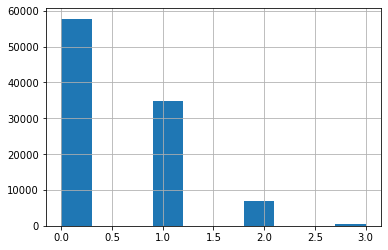

In [397]:
gambling_rolls["match_count"] = (
                                (gambling_rolls[0] == random_choice_match).astype(int)+ 
                                (gambling_rolls[1] == random_choice_match).astype(int)+
                                (gambling_rolls[2] == random_choice_match).astype(int)
                                )
print("matches on random for 3 by 6 sided die",(gambling_rolls["match_count"]).hist())



In [ ]:
#no it is not a fair game of 1/6+1/6+1/6 odds (50%), losing chance of no match is 57.8%
#after 1,000,000 games your losses would be (1,000,000 * .578 =) a loss of 578,000 (still retain 422,000)